# Init

## Installs

In [1]:
# %pip install scikit-learn torch xgboost shap

In [1]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), ".."))

## Imports

In [2]:
import os
import json
import joblib
from datetime import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import torch

from models.mlp.MLP import MultiLayerPerceptron, data_loader

In [3]:
MODELS_PATH = os.path.join(os.getcwd(), '..', "models")

## Data Processing

In [4]:
dataset_filename = "processed_dataset.csv"

DATA_PATH = os.path.join(os.getcwd(), '..', "data")
dataset_path = os.path.join(DATA_PATH, dataset_filename)

In [5]:
dataset = pd.read_csv(dataset_path)

In [6]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.drop("class", axis=1), dataset["class"], test_size=0.2, random_state=1234)
print(y_train.value_counts())
print(y_test.value_counts())

class
1    75
0    37
Name: count, dtype: int64
class
1    16
0    12
Name: count, dtype: int64


# Grid Search & training

## kNN

### Grid Search setup

In [170]:
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'metric': ['minkowski', 'manhattan', 'cosine', 'haversine'],
    'weights': ['uniform', 'distance']
}

In [171]:
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

c:\Users\FUJITSU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\FUJITSU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\FUJITSU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\FUJIT

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'cosine',
                                    'haversine'],
                         'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']})

### Best results

In [172]:
best_knn_params = knn_grid_search.best_params_
best_knn_model = knn_grid_search.best_estimator_

In [173]:
# save best model and hyperparametrs into files
if not os.path.exists(os.path.join(MODELS_PATH, "knn")):
    os.makedirs(os.path.join(MODELS_PATH, "knn"))
with open(os.path.join(MODELS_PATH, "knn", 'best_params.json'), 'w') as f:
    json.dump(best_knn_params, f, indent=4)

joblib.dump(best_knn_model, os.path.join(MODELS_PATH, "knn", 'model.joblib'))

['c:\\Users\\FUJITSU\\Desktop\\Code\\repos\\wrist-movement-classification\\classification\\..\\models\\knn\\model.joblib']

## Logistic Regression

### Grid Search setup

In [11]:
logistic_regression_param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
    'max_iter': [50, 100, 150, 200, 250, 300, 500],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0],
    'class_weight': [None, 'balanced']
}

In [ ]:
logistic_regression_grid_search = GridSearchCV(LogisticRegression(), logistic_regression_param_grid, cv=5)
logistic_regression_grid_search.fit(X_train, y_train)

### Best results

In [13]:
best_logreg_params = logistic_regression_grid_search.best_params_
best_logreg_model = logistic_regression_grid_search.best_estimator_

In [ ]:
# save best model and hyperparametrs into files
if not os.path.exists(os.path.join(MODELS_PATH, "logistic_regression")):
    os.makedirs(os.path.join(MODELS_PATH, "logistic_regression"))
with open(os.path.join(MODELS_PATH, "logistic_regression", 'best_params.json'), 'w') as f:
    json.dump(best_logreg_params, f, indent=4)

joblib.dump(best_logreg_model, os.path.join(MODELS_PATH, "logistic_regression", 'model.joblib'))

## Naive Bayes

### Grid Search setup

In [15]:
bayes_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

In [ ]:
bayes_grid_search = GridSearchCV(GaussianNB(), bayes_param_grid, cv=5)
bayes_grid_search.fit(X_train, y_train)

### Best results

In [17]:
best_bayes_params = bayes_grid_search.best_params_
best_bayes_model = bayes_grid_search.best_estimator_

In [ ]:
# save best model and hyperparametrs into files
if not os.path.exists(os.path.join(MODELS_PATH, "naive_bayes")):
    os.makedirs(os.path.join(MODELS_PATH, "naive_bayes"))
with open(os.path.join(MODELS_PATH, "naive_bayes", 'best_params.json'), 'w') as f:
    json.dump(best_bayes_params, f, indent=4)

joblib.dump(best_bayes_model, os.path.join(MODELS_PATH, "naive_bayes", 'model.joblib'))

## SVM

### Grid Search setup

In [19]:
svm_param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'coef0': [-1, 0, 1, 2, 3],
    'shrinking': [False],
    'class_weight': [None, 'balanced']
}

In [ ]:
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

### Best results

In [21]:
best_svm_params = svm_grid_search.best_params_
best_svm_model = svm_grid_search.best_estimator_

In [ ]:
# save best model and hyperparametrs into files
if not os.path.exists(os.path.join(MODELS_PATH, "svm")):
    os.makedirs(os.path.join(MODELS_PATH, "svm"))
with open(os.path.join(MODELS_PATH, "svm", 'best_params.json'), 'w') as f:
    json.dump(best_svm_params, f, indent=4)

joblib.dump(best_svm_model, os.path.join(MODELS_PATH, "svm", 'model.joblib'))

## Decision Tree

### Grid Search setup

In [23]:
decision_tree_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
    'min_weight_fraction_leaf': [0.01, 0.02, 0.03, 0.04, 0.05],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [ ]:
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5)
decision_tree_grid_search.fit(X_train, y_train)

### Best results

In [25]:
best_dt_params = decision_tree_grid_search.best_params_
best_dt_model = decision_tree_grid_search.best_estimator_

In [ ]:
# save best model and hyperparametrs into files
if not os.path.exists(os.path.join(MODELS_PATH, "decision_tree")):
    os.makedirs(os.path.join(MODELS_PATH, "decision_tree"))
with open(os.path.join(MODELS_PATH, "decision_tree", 'best_params.json'), 'w') as f:
    json.dump(best_dt_params, f, indent=4)

joblib.dump(best_dt_model, os.path.join(MODELS_PATH, "decision_tree", 'model.joblib'))

## Random Forest

### Grid Search setup

In [31]:
random_forest_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 5, 7, 8],
    'min_samples_leaf': [1, 2, 5, 7],
    'min_weight_fraction_leaf': [0.01, 0.03, 0.05], 
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'n_estimators': [20, 50, 100, 150, 200],
    'bootstrap': [False, True],
    'warm_start': [False, True]
}

In [ ]:
random_forest_grid_search = GridSearchCV(RandomForestClassifier(), random_forest_param_grid, cv=5)
random_forest_grid_search.fit(X_train, y_train)

### Best results

In [ ]:
best_rf_params = random_forest_grid_search.best_params_
best_rf_model = random_forest_grid_search.best_estimator_

In [ ]:
# save best model and hyperparametrs into files
if not os.path.exists(os.path.join(MODELS_PATH, "random_forest")):
    os.makedirs(os.path.join(MODELS_PATH, "random_forest"))
with open(os.path.join(MODELS_PATH, "random_forest", 'best_params.json'), 'w') as f:
    json.dump(best_rf_params, f, indent=4)

joblib.dump(best_rf_model, os.path.join(MODELS_PATH, "random_forst", 'model.joblib'))

## XGBoost

### Grid Search setup

In [8]:
xgboost_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200, 300],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 4],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2, 0.3]
}

In [ ]:
xgboost_grid_search = GridSearchCV(XGBClassifier(), xgboost_param_grid, cv=5)
xgboost_grid_search.fit(X_train, y_train)

### Best results

In [ ]:
best_xgb_params = xgboost_grid_search.best_params_
best_xgb_model = xgboost_grid_search.best_estimator_

In [ ]:
# save best model and hyperparametrs into files
if not os.path.exists(os.path.join(MODELS_PATH, "xgboost")):
    os.makedirs(os.path.join(MODELS_PATH, "xgboost"))
with open(os.path.join(MODELS_PATH, "xgboost", 'best_params.json'), 'w') as f:
    json.dump(best_rf_params, f, indent=4)

joblib.dump(best_rf_model, os.path.join(MODELS_PATH, "xgboost", 'model.joblib'))

## MLP

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score

In [22]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size=32, output_size=1, activation='relu',
                 optimizer='adam', batch_size=32, regularization=0.0001,
                 epochs=100, lr=0.01, loss='hinge',
                 report=True):
        super(MultiLayerPerceptron, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size  # Default to 32 if not specified
        self.output_size = output_size
        self.activation = activation
        self.optimizer_name = optimizer
        self.batch_size = batch_size
        self.regularization = regularization
        self.epochs = epochs
        self.lr = lr
        self.loss_name = loss
        self.report = report

        # Define layers
        self.fc1 = nn.Linear(input_size, self.hidden_size)  # Input layer
        self.fc2 = nn.Linear(self.hidden_size, self.hidden_size)  # Hidden layer
        self.fc3 = nn.Linear(self.hidden_size, output_size)  # Output layer

        # Activation functions
        self.activation_dict = {
            'relu': nn.ReLU(),
            'leaky_relu': nn.LeakyReLU(),
            'tanh': nn.Tanh(),
            'swish': nn.SiLU(),
            'gelu': nn.GELU(),
            'selu': nn.SELU(),
            'sigmoid': nn.Sigmoid(),
        }
        self.activation_fn = self.activation_dict.get(self.activation, nn.ReLU())

        # Optimizers
        self.optimizer_dict = {
            'adam': optim.Adam,
            'rmsprop': optim.RMSprop,
            'sgd': optim.SGD
        }
        self.optimizer_fn = self.optimizer_dict.get(self.optimizer_name, optim.Adam)

        # Loss functions
        self.loss_dict = {
            'mse': nn.MSELoss(),
            'hinge': nn.HingeEmbeddingLoss(),
            'log': nn.BCEWithLogitsLoss(),
        }
        self.loss_fn = self.loss_dict.get(self.loss_name, nn.BCEWithLogitsLoss())

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation_fn(out)
        out = self.fc2(out)
        out = self.activation_fn(out)
        out = self.fc3(out)
        out = self.activation_dict['sigmoid'](out)
        return out

    def train_model(self, train_loader, val_loader=None):
        optimizer = self.optimizer_fn(self.parameters(), lr=self.lr, weight_decay=self.regularization)
        criterion = self.loss_fn

        best_f1 = 0
        for epoch in range(self.epochs):
            self.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self(inputs).squeeze()
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * inputs.size(0)

            epoch_loss = running_loss / len(train_loader.dataset)

            if val_loader:
                f1 = self.evaluate(val_loader)
                if f1 > best_f1:
                    best_f1 = f1
                if self.report:
                    print(f'Epoch {epoch+1}/{self.epochs}, Loss: {epoch_loss:.4f}, F1: {f1:.2f}%')
            else:
                if self.report:
                    print(f'Epoch {epoch+1}/{self.epochs}, Loss: {epoch_loss:.4f}')

        return best_f1

    def evaluate(self, dataloader):
        self.eval()
        all_labels = []
        all_preds = []
        with torch.no_grad():
            for inputs, labels in dataloader:
                outputs = self(inputs)
                predicted = (outputs > 0.5).float()
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())

        f1 = f1_score(all_labels, all_preds, average='binary') * 100
        return f1

    def predict(self, data):
        """
        This function takes a list of floats as input and returns a single float between 0 and 1.
        """
        if len(data) != self.input_size:
            raise ValueError(f"Input data must be a list of {self.input_size} floats.")

        # Convert data to a tensor
        data_tensor = torch.tensor(data, dtype=torch.float).unsqueeze(0)  # Add batch dimension

        # Forward pass through the network
        self.eval()
        with torch.no_grad():
            output = self.forward(data_tensor)

        return output.item()


In [23]:
def data_loader(X, y, batch_size):
    X = torch.tensor(X.values, dtype=torch.float32)
    y = torch.tensor(y.values, dtype=torch.float32)

    dataset = TensorDataset(X, y)

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return dataloader

In [35]:
# create new validation subset from train split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

### Grid Search

In [ ]:
input_size = 15 

# Hyperparameter grid
hidden_sizes = [4, 8, 16, 32, 64]
activations = ['relu', 'leaky_relu', 'tanh', 'swish', 'gelu', 'selu']
optimizers = ['adam', 'rmsprop', 'sgd']
batch_sizes = [4, 8, 16, 32]
regularizations = [0.0001, 0.001, 0.01]
epochs_list = [5, 10, 20, 30, 50, 80, 100]
learning_rates = [0.001, 0.01, 0.1]
losses = ['mse', 'hinge', 'log']


In [ ]:
MLP_PATH = os.path.join(MODELS_PATH, "mlp")

In [ ]:
import itertools

# Create all combinations
hyperparameter_combinations = list(itertools.product(
    hidden_sizes,
    activations,
    optimizers,
    batch_sizes,
    regularizations,
    epochs_list,
    learning_rates,
    losses
))

print(f"Total hyperparameter combinations: {len(hyperparameter_combinations)}")

# To store results
results = []

# Iterate through each combination
for idx, (hidden_size, activation, optimizer_name, batch_size,
          regularization, epochs, lr, loss_name) in enumerate(hyperparameter_combinations, 1):

    print(f"\nRunning combination {idx}/{len(hyperparameter_combinations)}:")
    print(f"Hidden Size: {hidden_size}, Activation: {activation}, Optimizer: {optimizer_name}, "
          f"Batch Size: {batch_size}, Regularization: {regularization}, Epochs: {epochs}, "
          f"Learning Rate: {lr}, Loss: {loss_name}")

    # Create DataLoaders with the current batch size
    train_loader = data_loader(X_train, y_train, batch_size)
    val_loader = data_loader(X_val, y_val, batch_size)

    # Initialize the model with current hyperparameters
    model = MultiLayerPerceptron(
        input_size=input_size,
        hidden_size=hidden_size,
        activation=activation,
        optimizer=optimizer_name,
        batch_size=batch_size,
        regularization=regularization,
        epochs=epochs,
        lr=lr,
        loss=loss_name,
        report=False
    )

    # Train the model and get the best F1 score
    try:
        best_f1 = model.train_model(train_loader, val_loader)
    except Exception as e:
        print(f"Error during training: {e}")
        best_f1 = None

    # Record the results
    results.append({
        'hidden_size': hidden_size,
        'activation': activation,
        'optimizer': optimizer_name,
        'batch_size': batch_size,
        'regularization': regularization,
        'epochs': epochs,
        'learning_rate': lr,
        'loss': loss_name,
        'best_f1': best_f1
    })

    # Optional: Save intermediate results to prevent data loss in case of interruptions
    df = pd.DataFrame(results)
    df.to_csv(os.path.join(MLP_PATH, 'grid_search_results.csv'), index=False)


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Drop combinations that failed (if any)
results_df = results_df.dropna(subset=['best_f1'])

# Find the best hyperparameter set
best_result = results_df.loc[results_df['best_f1'].idxmax()]

print("\nBest Hyperparameter Combination:")
print(best_result)


# Evaluation

In [46]:
models = []
eval_runtime = {}

## kNN

In [47]:
# model = joblib.load(os.path.join(MODELS_PATH, "knn", "model.joblib"))
best_params = json.load(open(os.path.join(MODELS_PATH, "knn", "best_params.json"), 'r'))
model = KNeighborsClassifier(**best_params)
model.fit(X_train, y_train)
models.append(model)

In [48]:
# start
start = datetime.now()
y_pred = model.predict(X_test)
# finish
finish = datetime.now()
runtime =  finish - start
eval_runtime["knn"] = int(runtime.microseconds)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {
    "f1_score": f1,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}

In [49]:
eval_runtime

{'knn': 2883}

In [50]:
results

{'f1_score': 0.8571428571428571,
 'accuracy': 0.8214285714285714,
 'precision': 0.7894736842105263,
 'recall': 0.9375}

<Axes: >

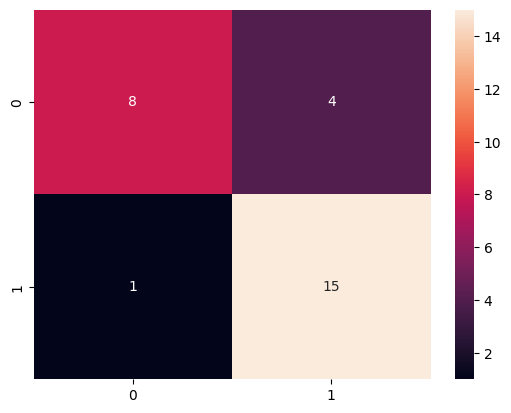

In [51]:
sns.heatmap(cm, annot=True)

## Logistic Regression

In [52]:
# model = joblib.load(os.path.join(MODELS_PATH, "logistic_regression", "model.joblib"))
best_params = json.load(open(os.path.join(MODELS_PATH, "logistic_regression", "best_params.json"), 'r'))
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)
models.append(model)

In [53]:
# start
start = datetime.now()
y_pred = model.predict(X_test)
# finish
finish = datetime.now()
runtime =  finish - start
eval_runtime["logreg"] = int(runtime.microseconds)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {
    "f1_score": f1,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}

In [54]:
eval_runtime

{'knn': 2883, 'logreg': 1007}

In [55]:
results

{'f1_score': 0.8108108108108109,
 'accuracy': 0.75,
 'precision': 0.7142857142857143,
 'recall': 0.9375}

<Axes: >

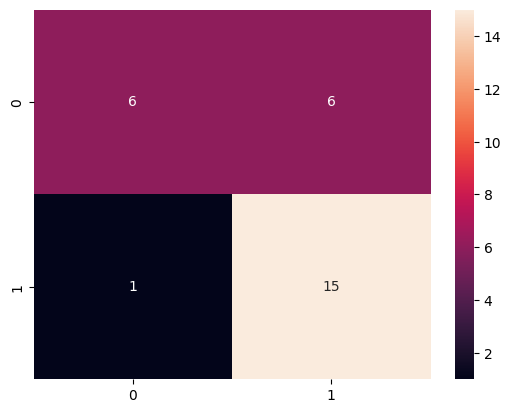

In [56]:
sns.heatmap(cm, annot=True)

## Naive Bayes

In [57]:
# model = joblib.load(os.path.join(MODELS_PATH, "naive_bayes", "model.joblib"))
best_params = json.load(open(os.path.join(MODELS_PATH, "naive_bayes", "best_params.json"), 'r'))
model = GaussianNB(**best_params)
model.fit(X_train, y_train)
models.append(model)

In [58]:
# start
start = datetime.now()
y_pred = model.predict(X_test)
# finish
finish = datetime.now()
runtime =  finish - start
eval_runtime["bayes"] = int(runtime.microseconds)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {
    "f1_score": f1,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}

In [59]:
eval_runtime

{'knn': 2883, 'logreg': 1007, 'bayes': 0}

In [60]:
results

{'f1_score': 0.7333333333333333,
 'accuracy': 0.7142857142857143,
 'precision': 0.7857142857142857,
 'recall': 0.6875}

<Axes: >

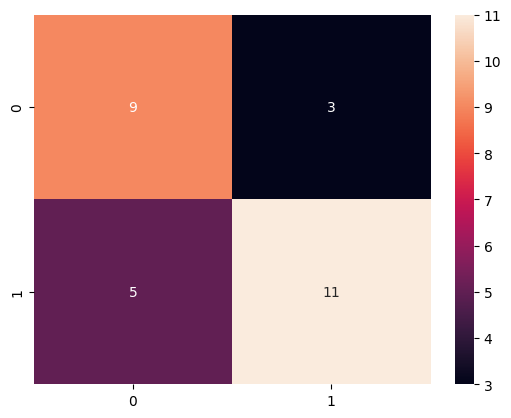

In [61]:
sns.heatmap(cm, annot=True)

## SVM

In [62]:
# model = joblib.load(os.path.join(MODELS_PATH, "svm", "model.joblib"))
best_params = json.load(open(os.path.join(MODELS_PATH, "svm", "best_params.json"), 'r'))
best_params["probability"] = True
# Create SVC model
model = SVC(**best_params)  # Set probability=True to use predict_proba

# Train the model
model.fit(X_train, y_train)

models.append(model)

In [63]:
# start
start = datetime.now()
y_pred = model.predict(X_test)
# finish
finish = datetime.now()
runtime =  finish - start
eval_runtime["svm"] = int(runtime.microseconds)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {
    "f1_score": f1,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}

In [64]:
results

{'f1_score': 0.8421052631578947,
 'accuracy': 0.7857142857142857,
 'precision': 0.7272727272727273,
 'recall': 1.0}

<Axes: >

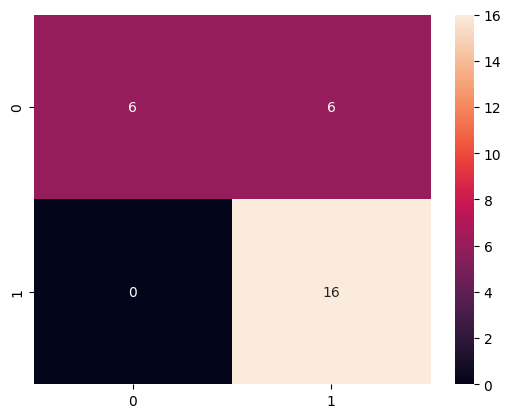

In [65]:
sns.heatmap(cm, annot=True)

## Decision Tree

In [66]:
best_params = json.load(open(os.path.join(MODELS_PATH, "decision_tree", "best_params.json"), 'r'))
model = DecisionTreeClassifier(**best_params)
model.fit(X_train, y_train)
models.append(model)

In [67]:
# start
start = datetime.now()
y_pred = model.predict(X_test)
# finish
finish = datetime.now()
runtime =  finish - start
eval_runtime["dt"] = int(runtime.microseconds)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {
    "f1_score": f1,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}

In [68]:
results

{'f1_score': 0.8,
 'accuracy': 0.75,
 'precision': 0.7368421052631579,
 'recall': 0.875}

<Axes: >

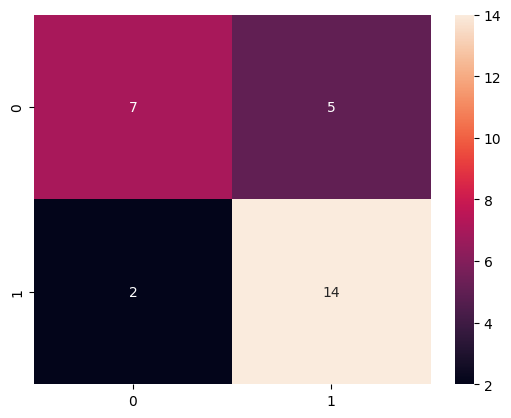

In [69]:
sns.heatmap(cm, annot=True)

## Random Forest

In [ ]:
# model = joblib.load(os.path.join(MODELS_PATH, "random_forest", "model.joblib"))
best_params = json.load(open(os.path.join(MODELS_PATH, "random_forest", "best_params.json"), 'r'))
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)
models.append(model)

In [71]:
# start
start = datetime.now()
y_pred = model.predict(X_test)
# finish
finish = datetime.now()
runtime =  finish - start
eval_runtime["rf"] = int(runtime.microseconds)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {
    "f1_score": f1,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}

In [72]:
results

{'f1_score': 0.8125,
 'accuracy': 0.7857142857142857,
 'precision': 0.8125,
 'recall': 0.8125}

<Axes: >

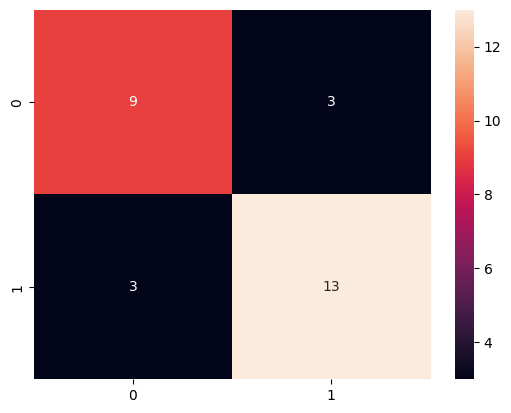

In [73]:
sns.heatmap(cm, annot=True)

## XGBoost

In [74]:
# model = joblib.load(os.path.join(MODELS_PATH, "xgboost", "model.joblib"))
best_params = json.load(open(os.path.join(MODELS_PATH, "xgboost", "best_params.json"), 'r'))
model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
models.append(model)

In [75]:
# start
start = datetime.now()
y_pred = model.predict(X_test)
# finish
finish = datetime.now()
runtime =  finish - start
eval_runtime["xgb"] = int(runtime.microseconds)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {
    "f1_score": f1,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}

In [76]:
results

{'f1_score': 0.8108108108108109,
 'accuracy': 0.75,
 'precision': 0.7142857142857143,
 'recall': 0.9375}

<Axes: >

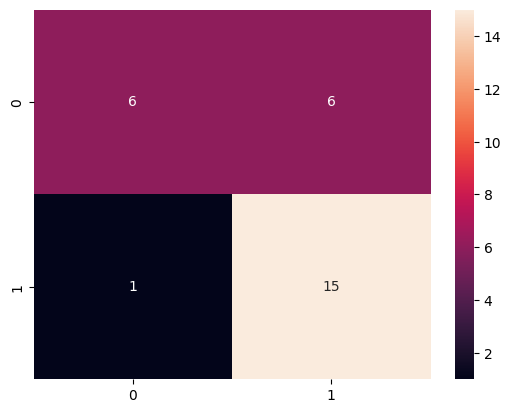

In [77]:
sns.heatmap(cm, annot=True)

## MLP (ANN)

In [78]:
best_params = json.load(open(os.path.join(MODELS_PATH, "mlp", "best_params.json"), 'r'))
best_params["lr"] = best_params["learning_rate"]
best_params["input_size"] = 15
del best_params["learning_rate"]
model = MultiLayerPerceptron(**best_params)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)


model.train_model(data_loader(X_train, y_train, best_params["batch_size"]), data_loader(X_val, y_val, best_params["batch_size"]))
models.append(model)

Epoch 1/50, Loss: 0.2768, F1: 82.35%
Epoch 2/50, Loss: 0.1974, F1: 80.00%
Epoch 3/50, Loss: 0.1624, F1: 87.50%
Epoch 4/50, Loss: 0.1403, F1: 87.50%
Epoch 5/50, Loss: 0.1404, F1: 87.50%
Epoch 6/50, Loss: 0.1187, F1: 87.50%
Epoch 7/50, Loss: 0.1172, F1: 87.50%
Epoch 8/50, Loss: 0.1191, F1: 87.50%


Epoch 9/50, Loss: 0.0980, F1: 87.50%
Epoch 10/50, Loss: 0.0940, F1: 87.50%
Epoch 11/50, Loss: 0.1067, F1: 87.50%
Epoch 12/50, Loss: 0.0975, F1: 87.50%
Epoch 13/50, Loss: 0.0843, F1: 87.50%
Epoch 14/50, Loss: 0.0835, F1: 87.50%
Epoch 15/50, Loss: 0.0815, F1: 87.50%
Epoch 16/50, Loss: 0.0928, F1: 87.50%
Epoch 17/50, Loss: 0.1706, F1: 87.50%
Epoch 18/50, Loss: 0.1545, F1: 87.50%
Epoch 19/50, Loss: 0.1002, F1: 88.89%
Epoch 20/50, Loss: 0.1255, F1: 94.12%
Epoch 21/50, Loss: 0.1228, F1: 87.50%
Epoch 22/50, Loss: 0.1025, F1: 87.50%
Epoch 23/50, Loss: 0.1052, F1: 87.50%
Epoch 24/50, Loss: 0.1026, F1: 87.50%
Epoch 25/50, Loss: 0.0951, F1: 87.50%
Epoch 26/50, Loss: 0.0870, F1: 87.50%
Epoch 27/50, Loss: 0.0816, F1: 87.50%
Epoch 28/50, Loss: 0.0813, F1: 87.50%
Epoch 29/50, Loss: 0.0773, F1: 87.50%
Epoch 30/50, Loss: 0.0884, F1: 87.50%
Epoch 31/50, Loss: 0.0925, F1: 87.50%
Epoch 32/50, Loss: 0.0963, F1: 87.50%
Epoch 33/50, Loss: 0.1297, F1: 87.50%
Epoch 34/50, Loss: 0.1286, F1: 87.50%
Epoch 35/50, 

In [79]:
# start
start = datetime.now()

y_pred = []
for _, elem in X_test.iterrows():
    pred = model.predict(list(elem))
    pred = 1 if pred > 0.5 else 0
    y_pred.append(pred)

# finish
finish = datetime.now()
runtime =  finish - start
eval_runtime["mlp"] = int(runtime.microseconds)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {
    "f1_score": f1,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}

In [80]:
results

{'f1_score': 0.8571428571428571,
 'accuracy': 0.8214285714285714,
 'precision': 0.7894736842105263,
 'recall': 0.9375}

<Axes: >

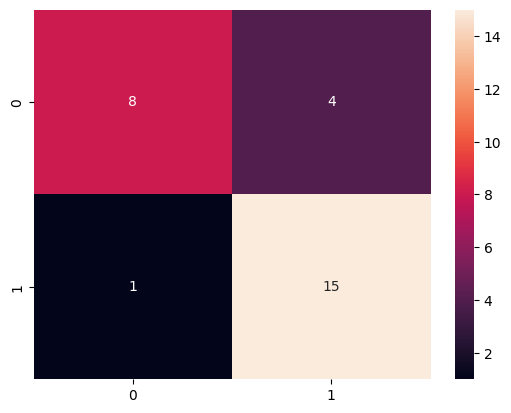

In [81]:
sns.heatmap(cm, annot=True)

# ROC & AUC

In [82]:
labels = ["kNN", "Logistic Regression", "Naive Bayes", "SVM", "Decision Tree", "Random Forest", "XGBoost", "MLP"]

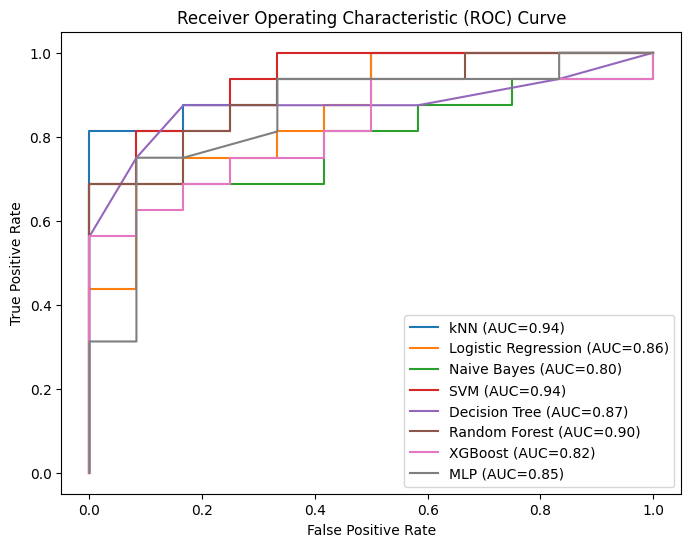

In [83]:
plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if label == "MLP":
        y_pred_prob = []
        for _, elem in X_test.iterrows():
            pred = model.predict(list(elem))
            y_pred_prob.append(pred)
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Assuming binary classification
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC={roc_auc:.2f})')

# Add labels, legend, and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<Axes: >

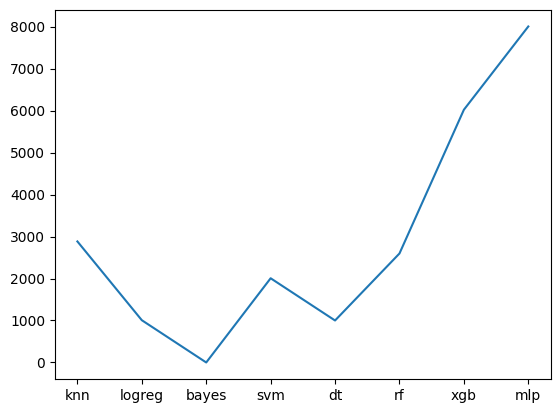

In [84]:
sns.lineplot(eval_runtime)